
# Домашнее задание "Продвинутая линейная алгебра"


## Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!
Найдите собственные значения и собственные вектора матриц:

```python
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

## Решение

In [1]:
import numpy
from matplotlib import pyplot
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

### a) Диагональная, ортогональная, но не единичная(!)

In [2]:
def print_matrix():
    matrix = numpy.array([[1, 0, 0],
                          [0, -1, 0],
                          [0, 0, 1]])
    transpose_matrix = matrix.transpose()

    print('Q:\n', matrix)
    print('\n')
    print('Qᵀ*Q = Е:\n',transpose_matrix @ matrix)

print_matrix()

Q:
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]


Qᵀ*Q = Е:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


### b) Верхнетреугольная, ортогональная
### c) Нижнетреугольная, ортогональная

Ответ:

Кажется что такой матрицы нет, она будет диагональной, но не треугольной

### с) Матрица, у которой определитель = 1, и все элементы не равны 0

In [3]:
def print_matrix_with_dot_one():
    matrix = numpy.array([[5, 3], [3, 2]])
    determinant = numpy.linalg.det(matrix)

    print('matrix:\n', matrix)
    print()
    print('determinant: {0:.2f}'.format(determinant))

print_matrix_with_dot_one()

matrix:
 [[5 3]
 [3 2]]

determinant: 1.00


### Найдите собственные значения и собственные вектора матриц:

In [4]:
def print_eigenvalues_eigenvectors_matrix():
    matrix = numpy.array([[-3,  3,  2],
                          [ 1, -1, -2],
                          [-1, -3,  0]])
    
    eigenvalues, eigenvectors =  numpy.linalg.eig(matrix)

    for index in range(len(eigenvalues)):
        print("Eigenvalue - {0:.2f}".format(eigenvalues[index]))
        print("Eigenvector - {}".format(eigenvectors[:,index]))
        print()


print_eigenvalues_eigenvectors_matrix()

Eigenvalue - 2.00
Eigenvector - [-2.01878445e-16  5.54700196e-01 -8.32050294e-01]

Eigenvalue - -4.00
Eigenvector - [ 9.48683298e-01 -3.16227766e-01  2.73252305e-17]

Eigenvalue - -2.00
Eigenvector - [ 8.94427191e-01 -4.24630503e-16  4.47213595e-01]



## Уровень 1:

Найдите спектральное разложение матрицы:
```python
m = np.array([[1, 2],
              [2,3]])
print(m)
```

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

----

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

## Решение

### Найдите спектральное разложение матрицы:

```python
m = np.array([[1, 2],
              [2,3]])
print(m)
```

In [5]:
def make_diagonal_matrix(matrix):
    eigenvalues, _ = numpy.linalg.eig(matrix)
    diagonal_value = []

    for line_index in range(matrix.shape[0]):
        line_values = []
        for item_index in range(matrix.shape[1]):
            if line_index == item_index:
                line_values.append(eigenvalues[line_index])
            else:
                line_values.append(0.0)
        diagonal_value.append(line_values)

    return numpy.array(diagonal_value)

def spectral_decomposition_matrix():
    matrix = numpy.array([[1,  2, 3],
                          [2, 3, 3],
                          [2, 3, 3]])
    
    print('Original matrix:\n', matrix)
    
    print()
    
    _, eigenvectors = numpy.linalg.eig(matrix)
    print('𝙑:\n', eigenvectors, '\n')

    diagonal_matrix = make_diagonal_matrix(matrix)
    print('𝞚:\n', diagonal_matrix, '\n')

    inv_matrix = numpy.linalg.inv(eigenvectors)
    print('𝙑¯¹:\n', inv_matrix, '\n')
    
    print('A = 𝙑𝞚𝙑¯¹')
    print(eigenvectors @ diagonal_matrix @ inv_matrix)

spectral_decomposition_matrix()

Original matrix:
 [[1 2 3]
 [2 3 3]
 [2 3 3]]

𝙑:
 [[-0.91764422  0.47605817  0.6882472 ]
 [ 0.28100631  0.62183946 -0.6882472 ]
 [ 0.28100631  0.62183946  0.22941573]] 

𝞚:
 [[-0.53112887  0.          0.        ]
 [ 0.          7.53112887  0.        ]
 [ 0.          0.          0.        ]] 

𝙑¯¹:
 [[-8.82789672e-01 -4.93134160e-01  1.16896654e+00]
 [ 3.98928481e-01  6.24878025e-01  6.77848634e-01]
 [ 2.34435323e-17 -1.08972474e+00  1.08972474e+00]] 

A = 𝙑𝞚𝙑¯¹
[[1. 2. 3.]
 [2. 3. 3.]
 [2. 3. 3.]]


### Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

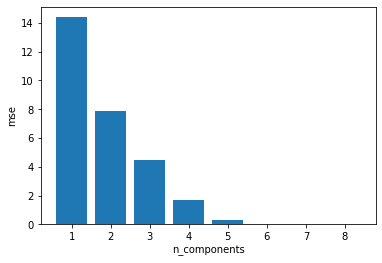

In [6]:
def show_graph():
    digits = load_digits()
    images = digits.images
    mean_squared_errors = []
    components = []
    
    for number in images:
        for component_count in range(1, 9):
            pca = PCA(n_components=component_count)
            number_reduced = pca.fit_transform(number)
            original_data = pca.inverse_transform(number_reduced)

            mse = mean_squared_error(number, original_data)
            mean_squared_errors.append(mse)
            components.append(component_count)

    pyplot.xlabel('n_components')
    pyplot.ylabel('mse')
    pyplot.bar(components, mean_squared_errors)


show_graph()